In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
feature = pd.read_csv("/content/drive/My Drive/walmart/features.csv", parse_dates=True)
stores = pd.read_csv("/content/drive/My Drive/walmart/stores.csv")
train = pd.read_csv("/content/drive/My Drive/walmart/train.csv", parse_dates=True)
test = pd.read_csv("/content/drive/My Drive/walmart/test.csv", parse_dates=True)
sample = pd.read_csv("/content/drive/My Drive/walmart/sampleSubmission.csv")

In [0]:
#Merging information between the data [Train and Test]
dfTrainTmp           = pd.merge(train, stores)
dfTestTmp            = pd.merge(test, stores)   
      
#Merging the feature with the data [Train and Test]
train                = pd.merge(dfTrainTmp, feature)
test                 = pd.merge(dfTestTmp, feature)

In [0]:
#Split the field Date
train['Year']        = pd.to_datetime(train['Date']).dt.year
train['Month']       = pd.to_datetime(train['Date']).dt.month
train['Day']         = pd.to_datetime(train['Date']).dt.day
train['Days']        = train['Month']*30+train['Day'] 

#Converting type of store to numeric
train['Type']        = train['Type'].replace('A',1)
train['Type']        = train['Type'].replace('B',2)
train['Type']        = train['Type'].replace('C',3)
    
#Counting the passend days util the holiday
train['daysHoliday'] = train['IsHoliday']*train['Days']
#Coverting the sales to log scale
train['logSales']    = np.log(4990+train['Weekly_Sales'])

#Same with test data
test['Year']         = pd.to_datetime(test['Date']).dt.year
test['Month']        = pd.to_datetime(test['Date']).dt.month
test['Day']          = pd.to_datetime(test['Date']).dt.day
test['Days']         = test['Month']*30+test['Day']
test['Type']         = test['Type'].replace('A',1)
test['Type']         = test['Type'].replace('B',2)
test['Type']         = test['Type'].replace('C',3)
test['daysHoliday']  = test['IsHoliday']*test['Days']

In [6]:
feature.groupby(["Store"]).head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8008,45,2010-02-05,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,False
8009,45,2010-02-12,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,True
8010,45,2010-02-19,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,False
8011,45,2010-02-26,34.89,2.754,NaN,NaN,NaN,NaN,NaN,182.077469,8.992,False


      count       mean       std  ...       50%       75%       max
Type                              ...                              
A      22.0  177247.73  49392.62  ...  202406.0  203819.0  219622.0
B      17.0  101190.71  32371.14  ...  114533.0  123737.0  140167.0
C       6.0   40541.67   1304.15  ...   39910.0   40774.0   42988.0

[3 rows x 8 columns]


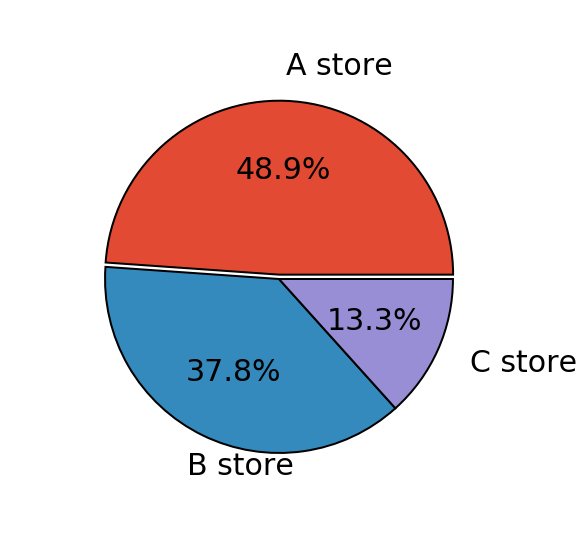

In [7]:
#https://www.kaggle.com/yepp2411/walmart-prediction-1-eda-with-time-and-space
grouped=stores.groupby('Type')
print(grouped.describe()['Size'].round(2))
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=grouped.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100] # convert to the proportion


fig, axes = plt.subplots(1,1, figsize=(10,10))

wprops={'edgecolor':'black',
      'linewidth':2}

tprops = {'fontsize':30}


axes.pie(sizes,
        labels=labels,
        explode=(0.02,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.8,
        center=(0.5,0.5))
plt.show()

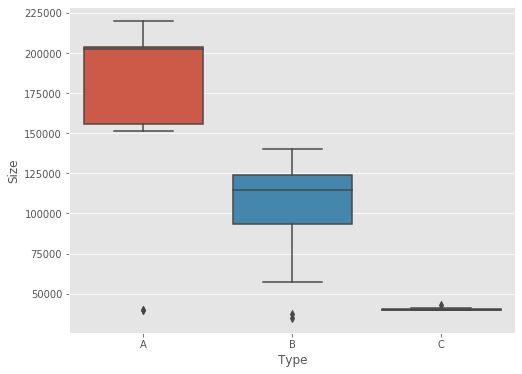

In [8]:
data = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=data)

In [0]:
#Dropping markdown data as most of it is null
train                = train.drop(['CPI','Unemployment','Date',
                                       'MarkDown1','MarkDown2','MarkDown3', 
                                       'MarkDown4','MarkDown5','Weekly_Sales'],axis=1)
                                       
test                 = test.drop(['CPI','Unemployment','Date',
                                      'MarkDown1','MarkDown2','MarkDown3',
                                      'MarkDown4','MarkDown5'],axis=1)

Removing features :CPI,Unemployment,Date,MarkDown1,MarkDown2,MarkDown3, MarkDown4,MarkDown5,Weekly_Sales

In [10]:
train.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,Year,Month,Day,Days,daysHoliday,logSales
0,1,1,False,1,151315,42.31,2.572,2010,2,5,65,0,10.306099
1,1,2,False,1,151315,42.31,2.572,2010,2,5,65,0,10.925853
2,1,3,False,1,151315,42.31,2.572,2010,2,5,65,0,9.837888
3,1,4,False,1,151315,42.31,2.572,2010,2,5,65,0,10.713173
4,1,5,False,1,151315,42.31,2.572,2010,2,5,65,0,10.524585


In [11]:
#https://github.com/leandromferreira/Kaggle-Walmart-Recruiting-Store-Sales-Forecasting

etr = ExtraTreesRegressor(n_estimators=1000, verbose=0, n_jobs=4)

#The file which contains sales for test data
result = open('/content/drive/My Drive/walmart/Untitled Folder/result_etr.csv','w')
result.write('Id,Weekly_Sales\n')
size = sample['Id'].count() #test size
i=0;

#Here for every row in sample file i.e for every dept store data we will fit our model separetly and predict sales.
while (i < size):

       Id           = sample['Id'][i]
       tmpStr       = Id.split('_')
       Store        = int(tmpStr[0])				                #Store ID
       Dept         = int(tmpStr[1])				                #Dept ID 
       dataF1       = train.loc[train['Dept']==Dept]				#Get the data from Dept  ID from all data
       tmpDf        = dataF1.loc[dataF1['Store']==Store]			#Get the data form Store ID from the filtring data 
       store_cnt        = tmpDf['Store'].count()
       dept_cnt	    = dataF1['Dept'].count()	
       tmpF         = dataF1.loc[train['IsHoliday']==1]
       dataF1       = pd.concat([dataF1,tmpF*4])		          	#Reforcing holiday data
       dataF2       = dataF1.loc[dataF1['Store']==Store]      		#Filtring 
       testF1       = test.loc[test['Dept']==Dept]		      		
       testF1       = testF1.loc[testF1['Store']==Store]
       testRows     = testF1['Store'].count()
       k            = i + testRows
		
       if (store_cnt < 10) and (dept_cnt!=0): #When the number of dataframe stores is too small RF fails then we will only work with department data
          y=np.asarray(dataF1['logSales'], dtype="|S6")
          X_train, X_test, y_train, y_test = train_test_split(dataF1.drop(['logSales'],axis=1),y)       
          
          trained_model  = etr.fit(dataF1.drop(['logSales'],axis=1),np.asarray(dataF1['logSales'],dtype=float))
       else:

          y=np.asarray(dataF2['logSales'], dtype="|S6")
          X_train, X_test, y_train, y_test = train_test_split(dataF2.drop(['logSales'],axis=1),y)          
          trained_model  = etr.fit(dataF2.drop(['logSales'],axis=1),np.asarray(dataF2['logSales'],dtype=float))
          
       tmpP_RF_Submiss      = ( np.exp(pd.to_numeric(trained_model.predict(testF1))) - 4990 )
      
       for j in range(i,k):                               
           result.write('%s,%s\n'%(sample['Id'][j],tmpP_RF_Submiss[j-i]))
       i+=testRows       
       print (i)
result.close()

39
78
117
156
195
234
273
312
351
390
429
468
507
546
585
624
656
695
734
773
812
851
890
929
968
1007
1046
1085
1124
1163
1202
1241
1280
1319
1358
1397
1436
1475
1514
1553
1592
1599
1638
1642
1680
1719
1758
1782
1821
1860
1899
1938
1977
2016
2055
2094
2133
2172
2211
2250
2289
2328
2367
2406
2445
2484
2523
2562
2601
2640
2679
2718
2757
2783
2822
2861
2900
2939
2978
3017
3056
3095
3134
3173
3212
3251
3290
3329
3368
3407
3442
3481
3520
3559
3598
3637
3676
3715
3754
3793
3832
3871
3910
3949
3988
4027
4066
4105
4144
4183
4222
4261
4300
4339
4378
4382
4421
4424
4463
4502
4541
4572
4611
4650
4689
4728
4767
4806
4845
4884
4923
4924
4963
5002
5041
5080
5119
5158
5197
5236
5275
5314
5353
5392
5431
5470
5509
5548
5580
5619
5658
5697
5736
5775
5814
5853
5892
5931
5970
6009
6048
6087
6126
6165
6204
6234
6273
6312
6351
6390
6429
6468
6507
6546
6585
6624
6663
6702
6741
6780
6819
6858
6897
6935
6974
7013
7052
7091
7130
7169
7174
7201
7240
7259
7298
7337
7360
7399
7438
7477
7516
7555
7594
7629
7668
77

In [0]:
sam1=pd.read_csv('/content/drive/My Drive/walmart/Untitled Folder/result_etr.csv')


In [0]:
sampleSubmission.to_csv('/content/drive/My Drive/walmart/Untitled Folder/result_etr',index=False)

In [15]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,34912.929233
1,1_1_2012-11-09,21725.406629
2,1_1_2012-11-16,24255.418720
3,1_1_2012-11-23,22587.728104
4,1_1_2012-11-30,26415.242360


Observtion:


*   only using ExtraTreesRegressor the score is 2746.44705

